## Sleep Quality Analysis

![sleeping cat](img/sleeping-cat.jpg)

## Introduction

Did you know that, on average, a human spends nearly one-third of their life sleeping? Sleep, though a common aspect of our lives, remains a complex and often misunderstood phenomenon. In a world where everything is accelerating, is it true that our sleep quality is deteriorating?

After this semester's exams, I wanted to approach this very interesting subject in a more relaxed way for this ML project, in order to understand how, as students or people in working life, we can improve the quality of our sleep in order to be more efficient or productive on a daily basis. For this we will explore the following dataset on sleep quality and then try to predict sleep quality score based on different features:
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In this exploration, we'll delve into factors influencing sleep quality beyond the familiar advice of a balanced diet and regular exercise. What are the other factors involved? How do our lifestyle and career choices affect our nightly rest? Let's examine these questions to unravel the intricacies of sleep and uncover insights that may enhance our daily lives. Get ready to embark on a quest where the path to a well-rested life may lie in the art of resting wisely.

## 1. EDA

**download libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Load dataset**

In [2]:

df=pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**missing values**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\575647293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.isnull().sum().index,y=df.isnull().sum().values,palette='rocket')


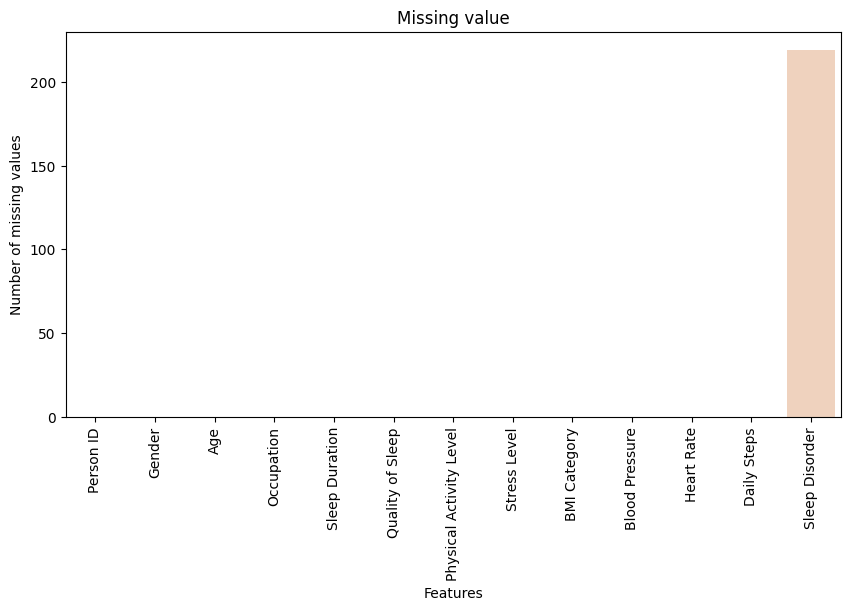

In [5]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.isnull().sum().index,y=df.isnull().sum().values,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing value')
plt.show()

In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')

df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**data repartition**

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

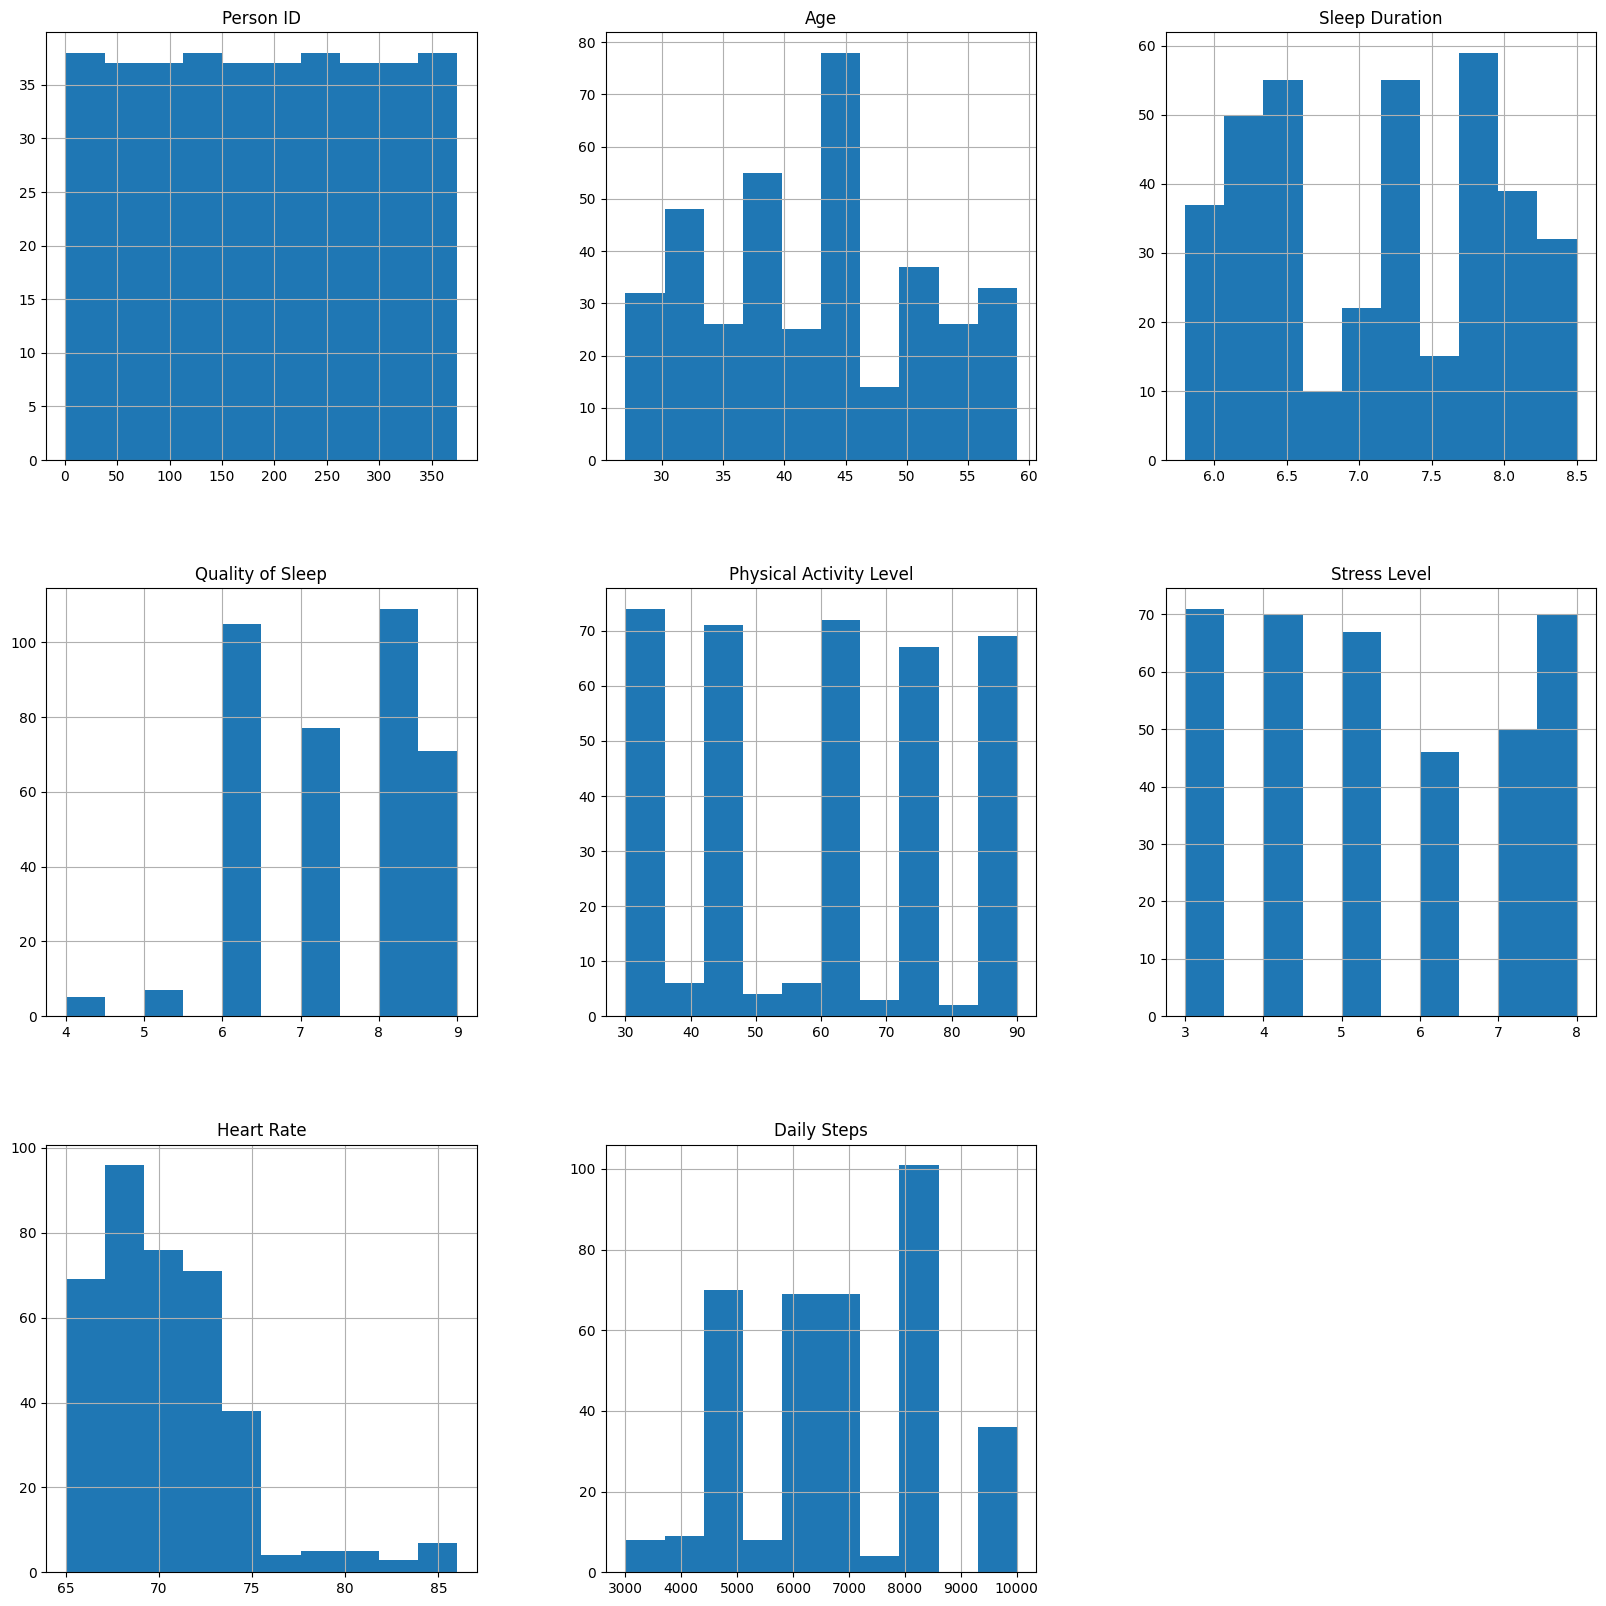

In [7]:
df.hist(figsize=(20,20))

**sleep quality count**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\937997611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality of Sleep',data=df,palette='rocket')


Text(0.5, 1.0, 'Quality of Sleep')

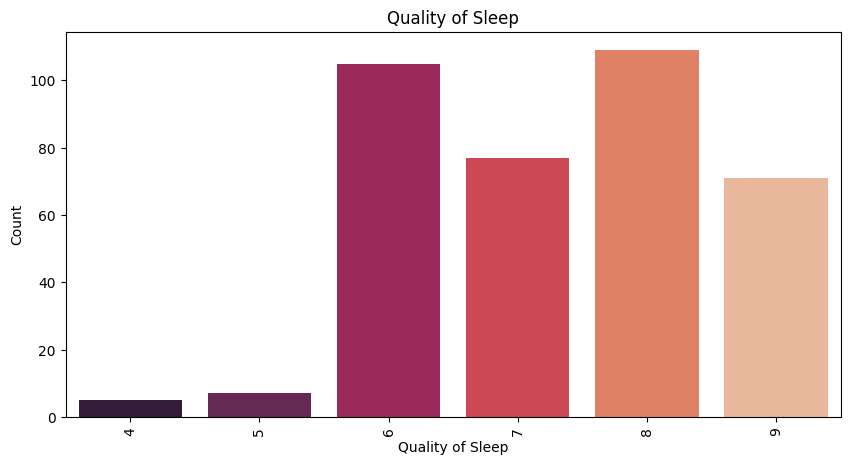

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Quality of Sleep',data=df,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('Quality of Sleep')

**sleep quality vs sleep duration**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\1998996487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quality of Sleep',y='Sleep Duration',data=df, palette='rocket')


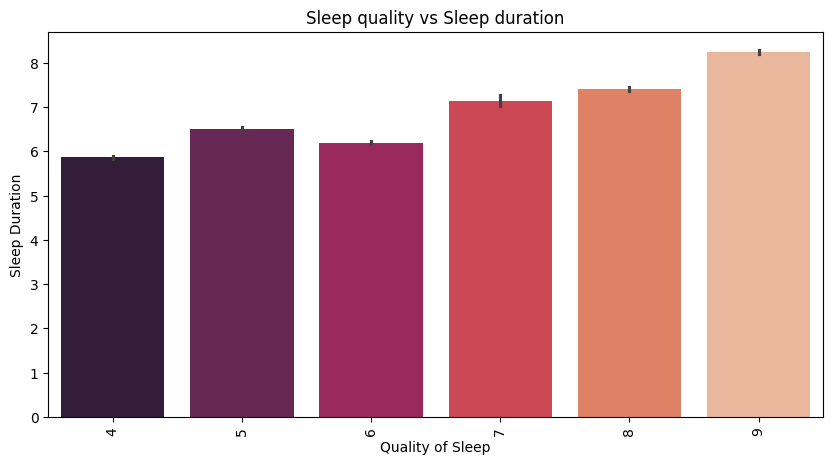

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Quality of Sleep',y='Sleep Duration',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Sleep quality vs Sleep duration')
plt.show()

We can see something that looks like a linear relationship between sleep duration and sleep quality: the more we sleep, the better we sleep! Let's we what factors help us to have a better and longer sleep.

**relationship between some features and sleep quality**

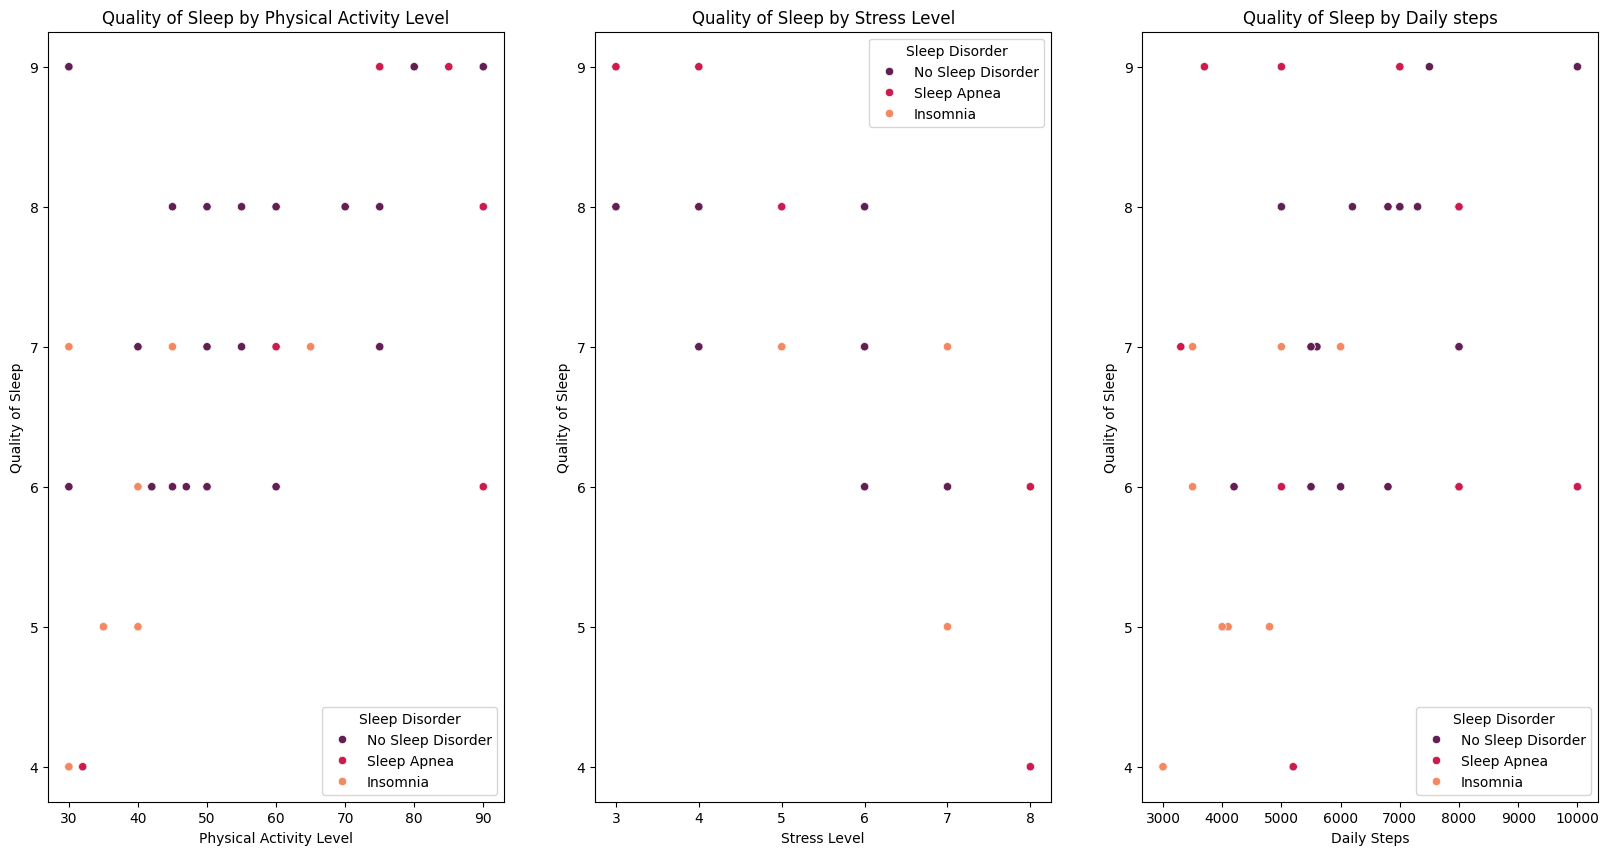

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df, hue='Sleep Disorder', palette='rocket')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep by Physical Activity Level')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df, hue='Sleep Disorder', palette='rocket')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep by Stress Level')


plt.subplot(1, 3, 3)
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=df, hue='Sleep Disorder', palette='rocket')
plt.xlabel('Daily Steps')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep by Daily steps')
plt.show()

plt.tight_layout()
plt.show()

We can observe that daily physical activity improves sleep quality, although the number of daily steps does not influence it proportionally. Stress level, on the other hand, is an essential and determining factor in sleep quality.

**distribution of ages in the dataset**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\1909990011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], color='red')


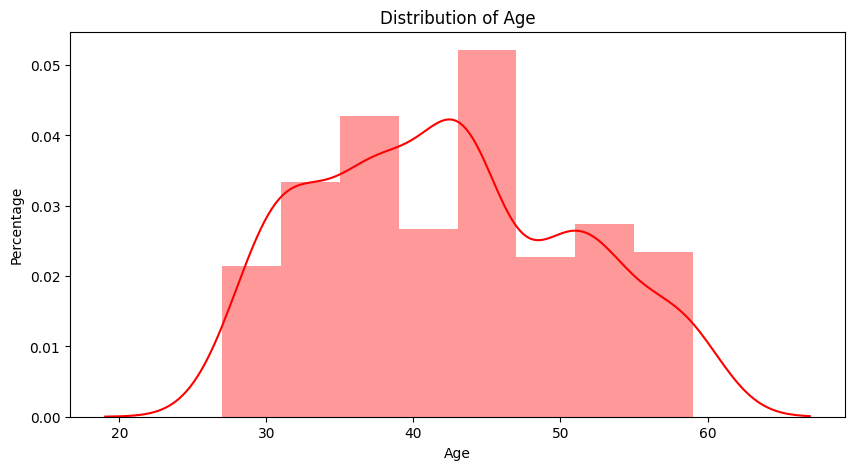

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'], color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()


**job occupation**

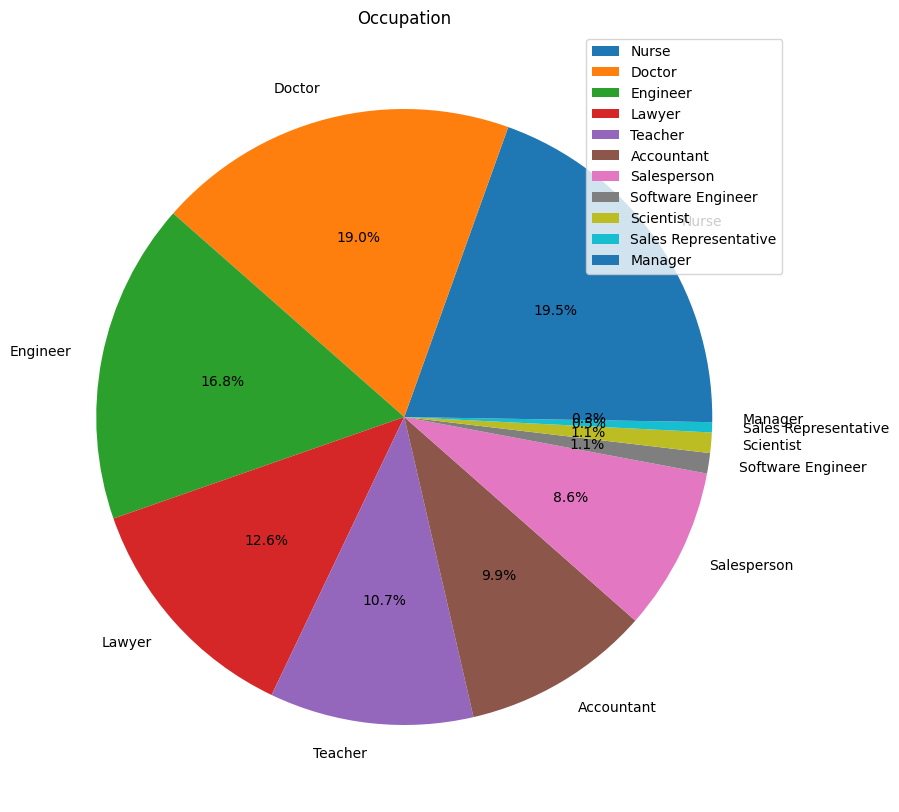

In [12]:
plt.figure(figsize=(10,10))
plt.pie(df['Occupation'].value_counts(), labels=df['Occupation'].value_counts().index, autopct='%1.1f%%')
plt.title('Occupation')
plt.legend()
plt.show()


**ocupation vs sleep quality**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\859249243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')


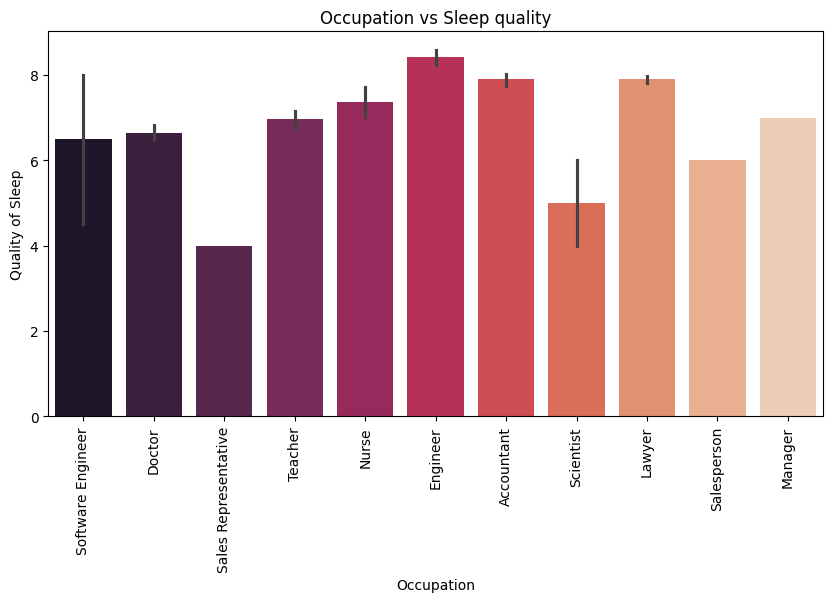

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Occupation vs Sleep quality')
plt.show()


It seems that our careers choices will influence our sleep quality!

**impact of career choice on sleep**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\1033479870.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')
C:\Users\loura\AppData\Local\Temp\ipykernel_20148\1033479870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation',y='Sleep Duration',data=df, palette='rocket')


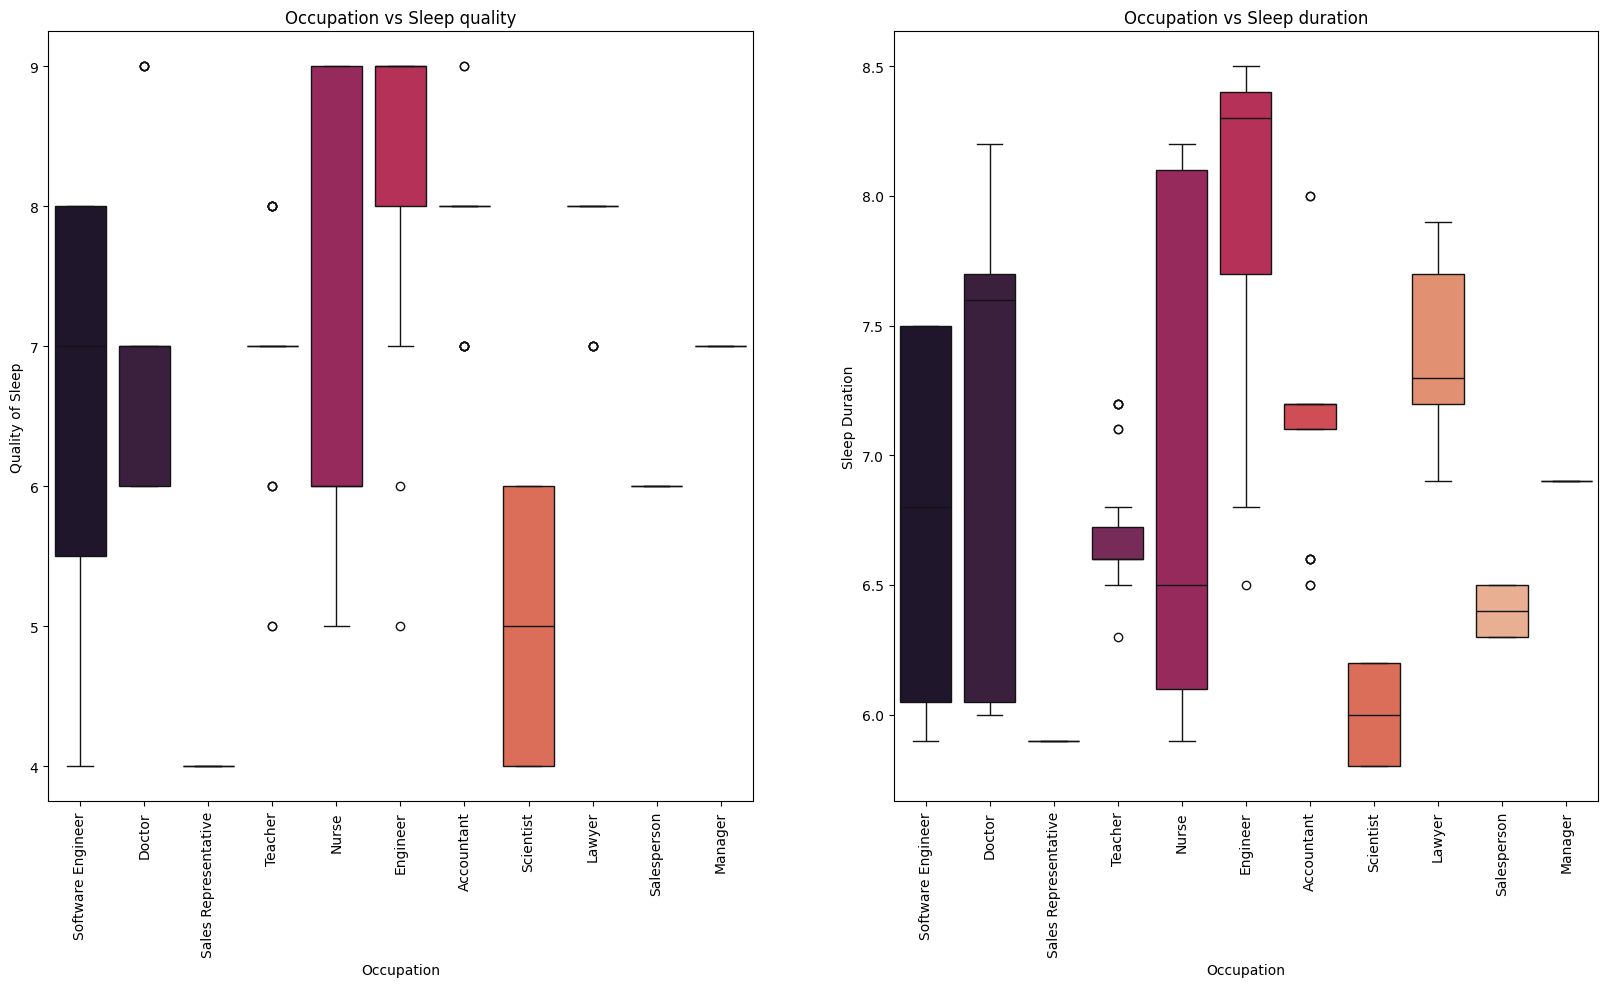

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Occupation vs Sleep quality')

plt.subplot(1, 2, 2)
sns.boxplot(x='Occupation',y='Sleep Duration',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Occupation vs Sleep duration')
plt.show()


Here it is interesting to see that the interquartile range of sleep quality and sleep duration varies greatly between occupations. This means that sleep quality and quantity are highly variable between different professions. This confirms the idea that our life/career choices greatly influence our sleep. I think it is interesting to correlate this with the stress level to see if thoose features are linked <br>
(ie job->stress level->sleep quality/duration)

stress level vs ocupation

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\853863807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation',y='Stress Level',data=df, palette='rocket')
C:\Users\loura\AppData\Local\Temp\ipykernel_20148\853863807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')


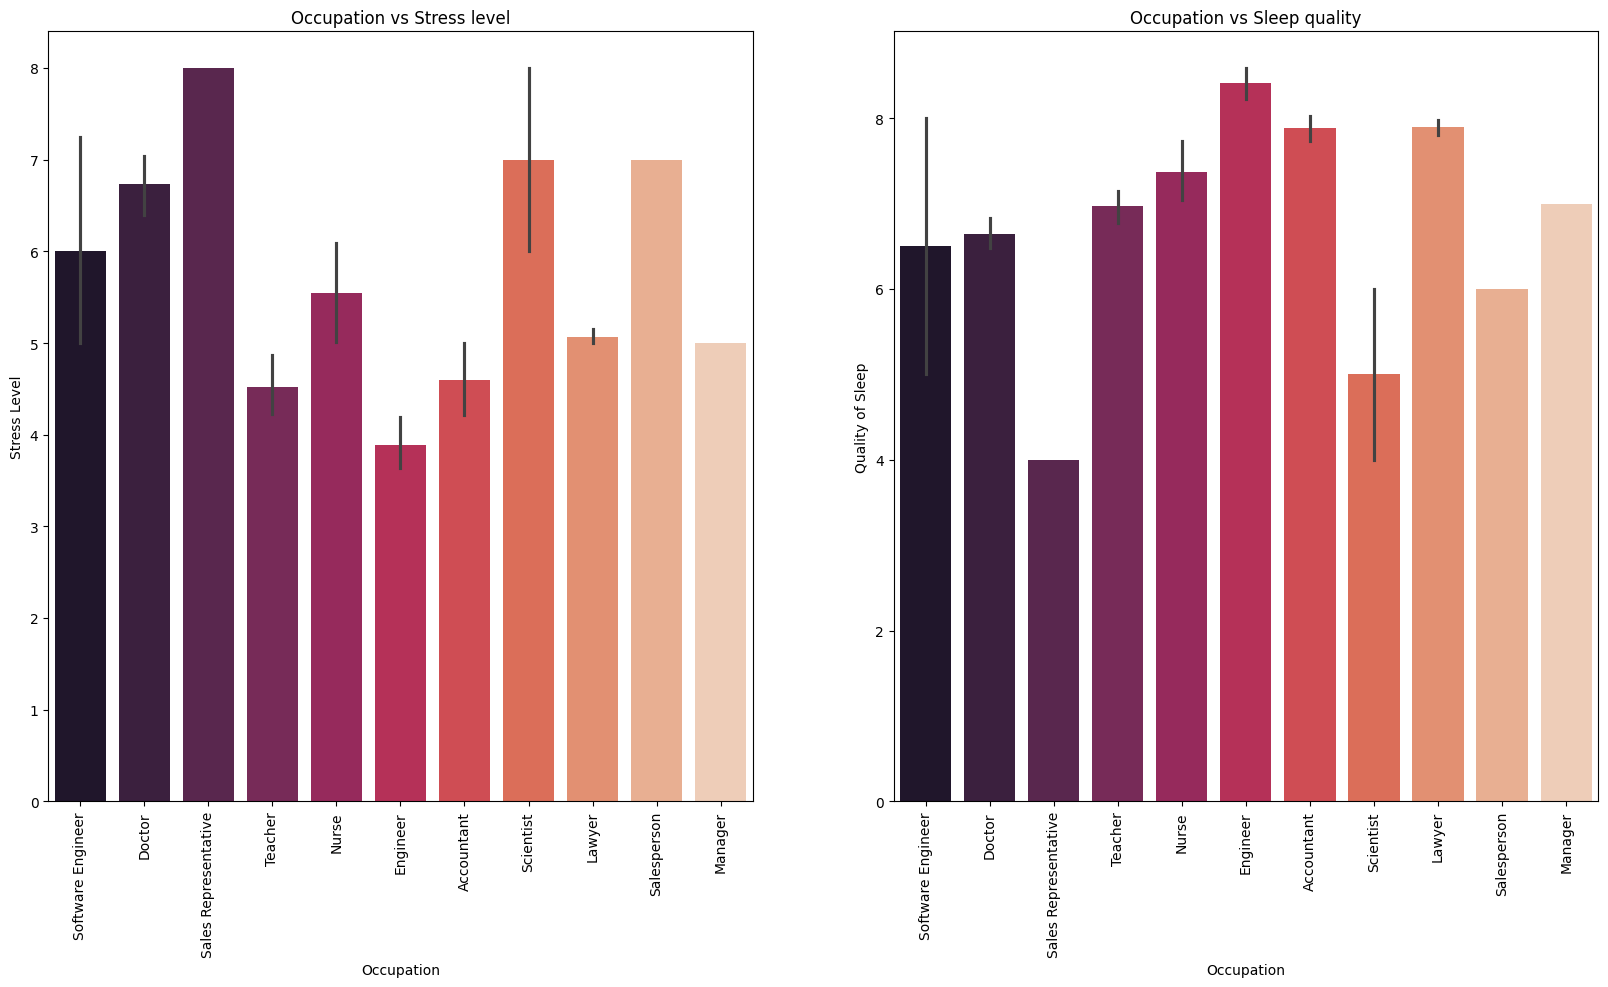

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Occupation',y='Stress Level',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Occupation vs Stress level')

plt.subplot(1, 2, 2)
sns.barplot(x='Occupation',y='Quality of Sleep',data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Occupation vs Sleep quality')
plt.show()




we see an inverse relationships between both subplots ie this confirms the idea of:
job -> stress level -> sleep quality/duration
with -> = influences

**Sleep Disorders**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\2647275222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Disorder',data=df, palette='rocket')


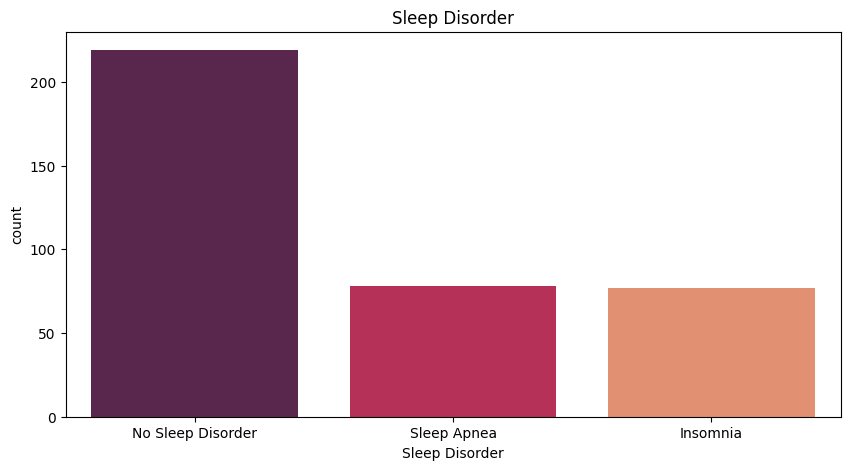

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sleep Disorder',data=df, palette='rocket')
plt.title('Sleep Disorder')
plt.show()

<Axes: xlabel='Gender', ylabel='Quality of Sleep'>

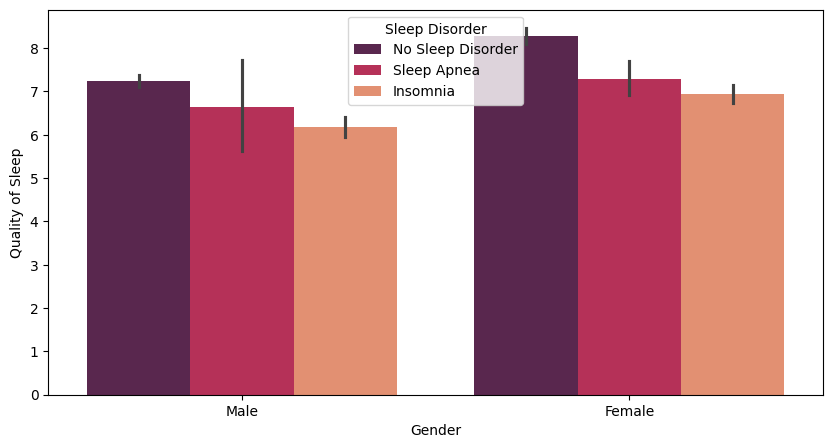

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender', y='Quality of Sleep', hue='Sleep Disorder', data=df, palette='rocket')

**impact of age on sleep quality**

C:\Users\loura\AppData\Local\Temp\ipykernel_20148\1819146906.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Age',y='Quality of Sleep',data=df, palette='rocket')


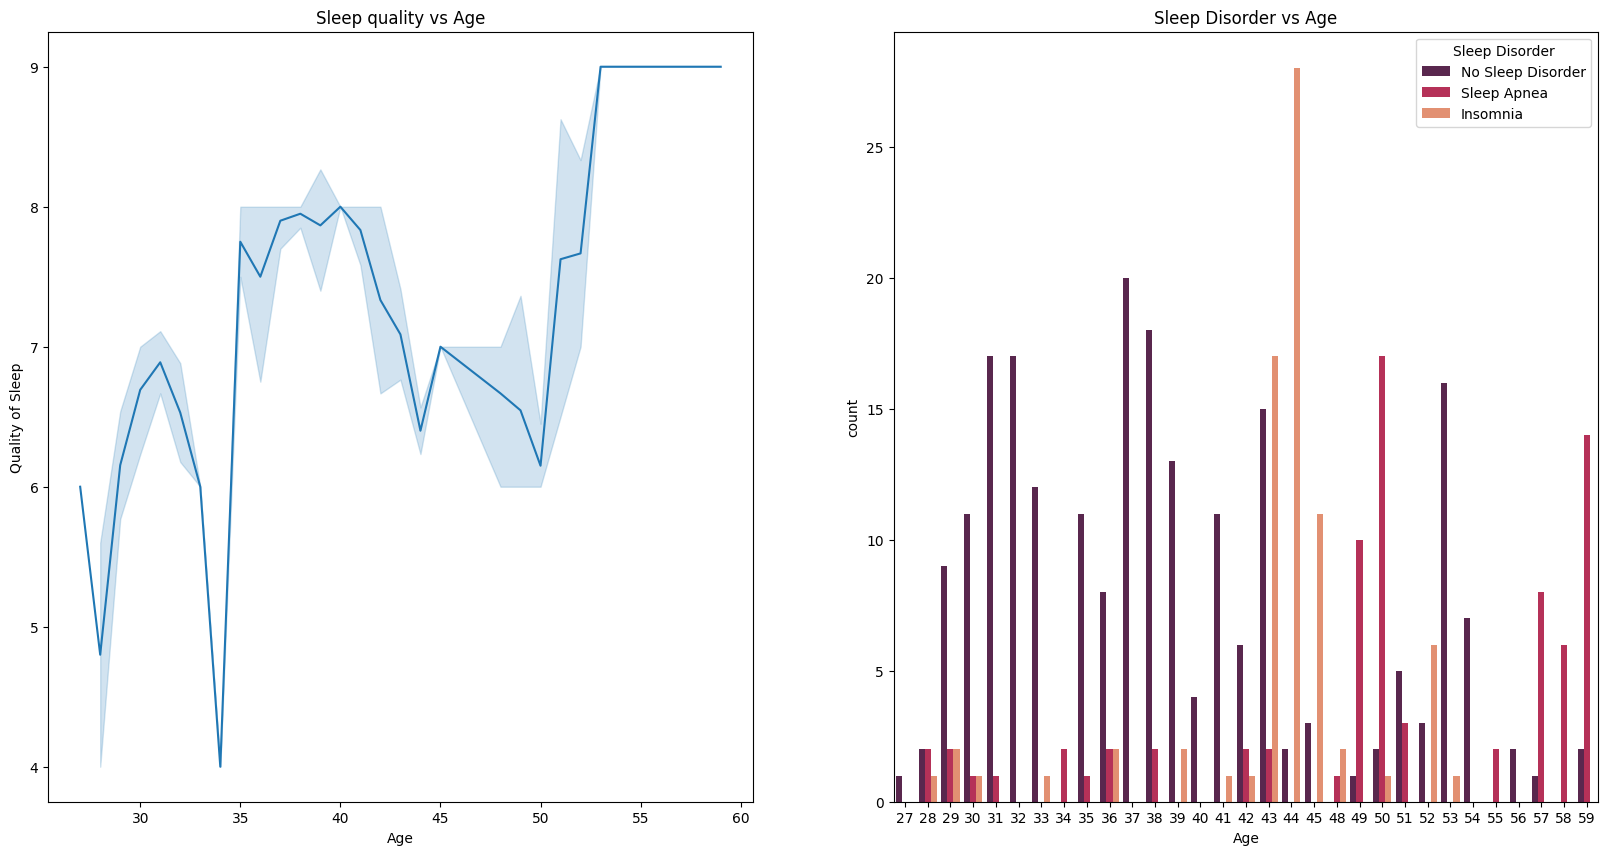

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.lineplot(x='Age',y='Quality of Sleep',data=df, palette='rocket')
plt.title('Sleep quality vs Age')

plt.subplot(1, 2, 2)

plt.title('Sleep Disorder vs Age')
sns.countplot(x='Age',hue='Sleep Disorder',data=df, palette='rocket')

plt.show()

**Sleep Disorder by BMI category**

In [19]:
fig = px.treemap(df, path=['Sleep Disorder', 'BMI Category'], values='Quality of Sleep')
fig.show()



**BMI, Blood Pressure and Heart Rate correlation**

Text(0.5, 1.0, 'Heart Rate Heatmap by BMI Category and Blood Pressure')

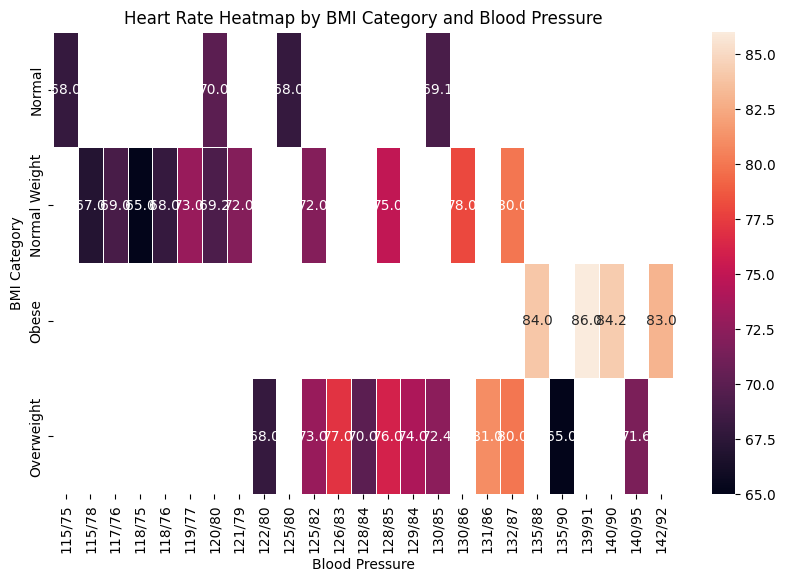

In [20]:
heatmap_data = df.pivot_table(index='BMI Category', columns='Blood Pressure', values='Heart Rate', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='rocket', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heart Rate Heatmap by BMI Category and Blood Pressure')

## 2. Data Preprocesing

**Missing values**

This part has already been done at the beginning of this notebook

In [21]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**Data types**

In [22]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

**Dropping columns**

We can drop Person ID as it is not a relevant feature for our model.

In [23]:
df.drop('Person ID', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Label encoding**

We'll use label encoding for non-numeric values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = df.columns
features = data.drop('Quality of Sleep')

# /!\ we don't want to encode the target variable to keep the original values

for feature in features:
    df[feature] = le.fit_transform(df[feature])
df.head()



,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,3,6,4,3,3,11,10,6,1
1,1,1,1,4,6,9,5,0,9,8,19,1
2,1,1,1,4,6,9,5,0,9,8,19,1
3,1,1,6,1,4,0,5,2,22,17,0,2
4,1,1,6,1,4,0,5,2,22,17,0,2


**correlation matrix**

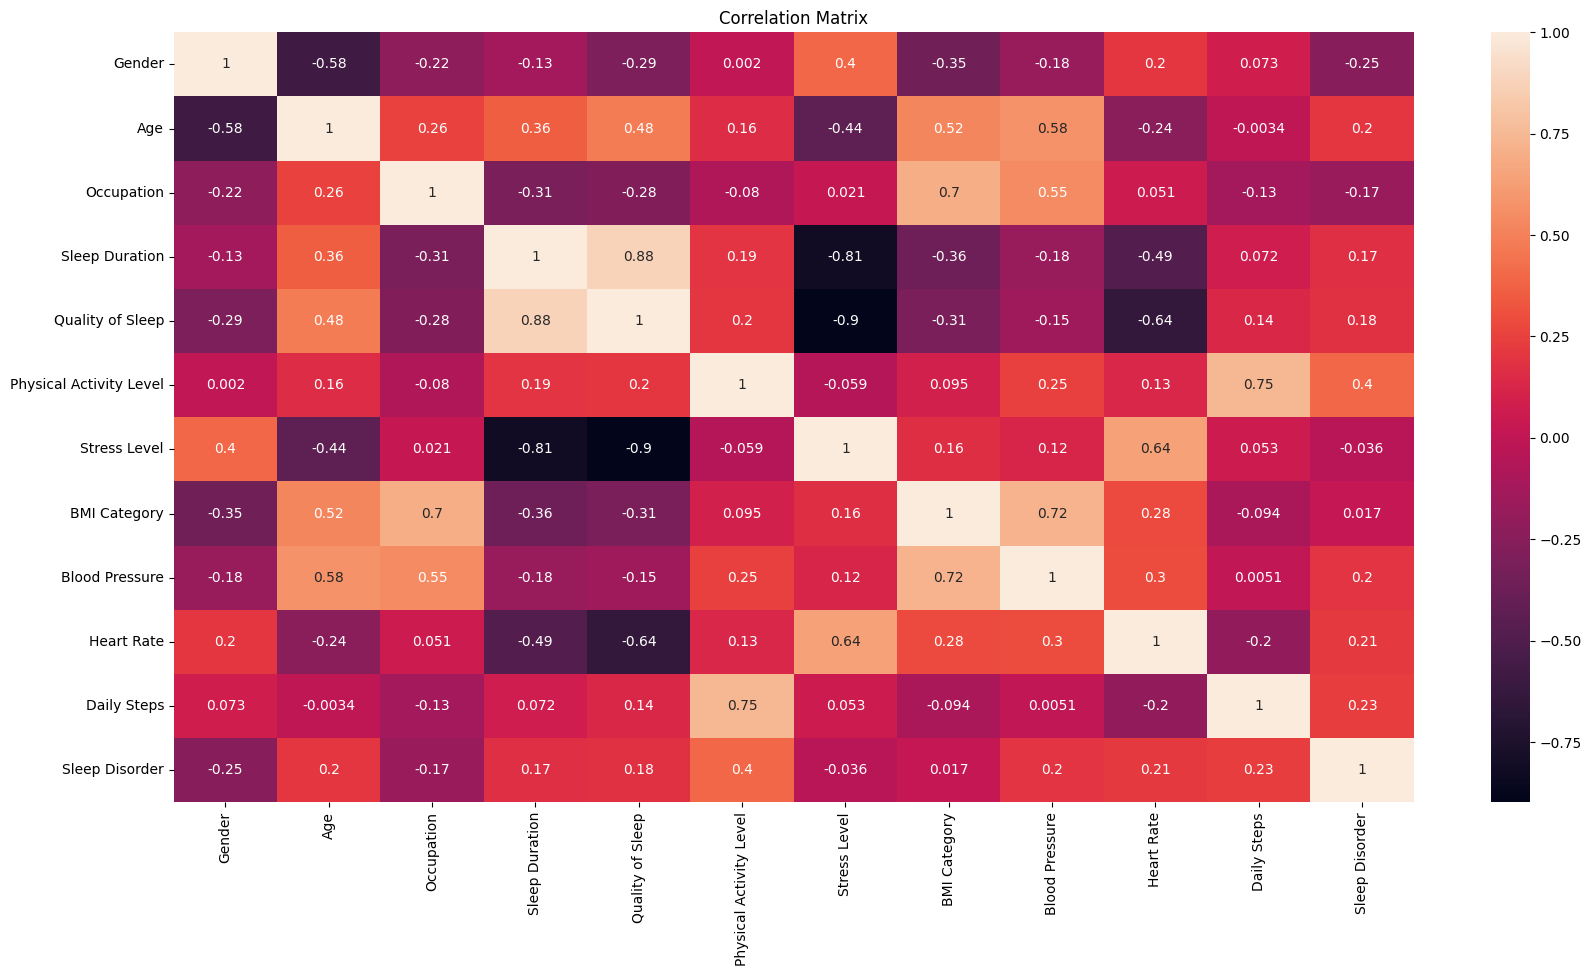

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

**Data splitting**

We will try to predict Quality of Sleep

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('Quality of Sleep', axis=1)
y = df['Quality of Sleep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
y_train.value_counts()

Quality of Sleep
8    84
6    81
7    64
9    59
5     6
4     5
Name: count, dtype: int64

## 3. ML models

As said previously, we'll try to predict quality of sleep (classification problem between 4 (poor sleep quality) and 9 (good sleep quality))

**XGBoost**

We first need to map the quality of sleep column as xgboost need classes starting from 0

In [28]:
mapping_labels = {4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5}
y_train_mapped = y_train.map(mapping_labels)
y_test_mapped = y_test.map(mapping_labels)




Accuracy score:  0.9733333333333334


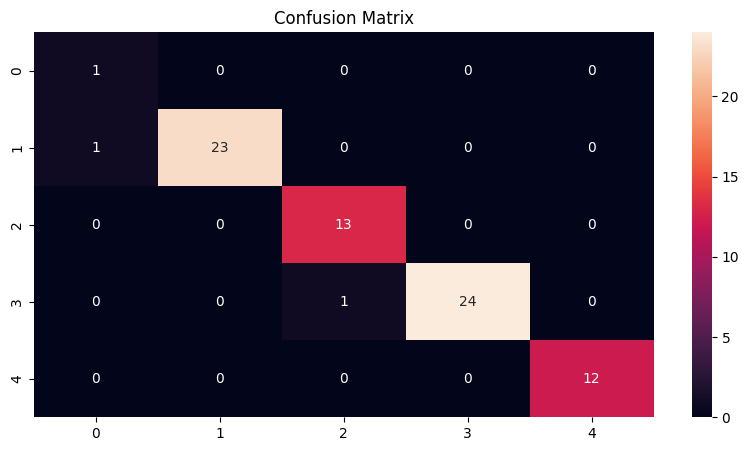

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train_mapped)
y_pred_mapped = xgb.predict(X_test)
y_pred = pd.Series(y_pred_mapped).map({0: 4, 1: 5, 2: 6, 3: 7, 4: 8, 5: 9})



from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap='rocket')
plt.title('Confusion Matrix')
plt.show()






C:\Users\loura\AppData\Local\Temp\ipykernel_20148\963148210.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




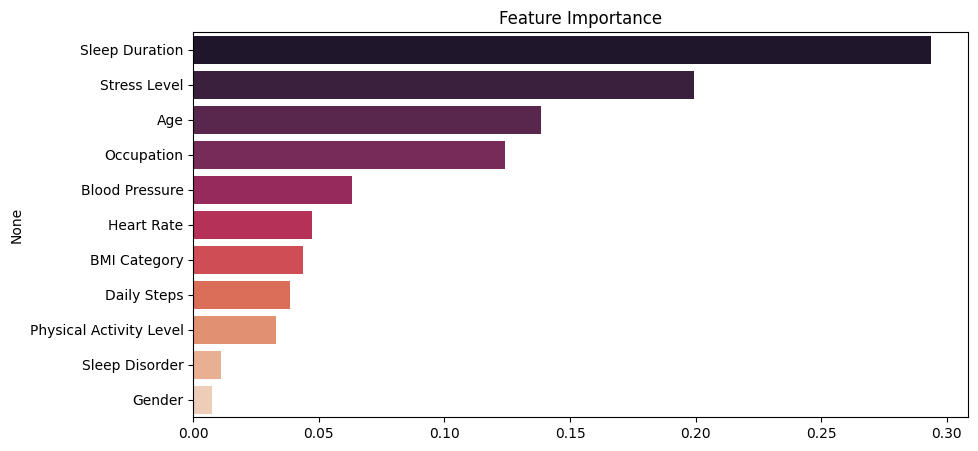

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb.feature_importances_, y=X.columns, palette='rocket', order=X.columns[np.argsort(xgb.feature_importances_)[::-1]])
plt.title('Feature Importance')
plt.show()
